In [4]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from helper import *

from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


raw_data = pd.read_csv("../Data/default_of_credit_card_clients.csv",header = 0)

#Check data sanity
raw_data.describe()
raw_data.isnull().sum()

#Check character variables levels

#SEX, EDUCATION, MARRIAGE

raw_data['SEX'].value_counts()
# 1    11888
# 2    18112

raw_data.groupby('EDUCATION')['EDUCATION'].count()
# 0       14
# 1    10585
# 2    14030
# 3     4917
# 4      123
# 5      280
# 6       51

raw_data.groupby('MARRIAGE')['MARRIAGE'].count()

# 0       54
# 1    13659
# 2    15964
# 3      323

# Chcek if the data is balanced
raw_data['default_payment_next_month'].value_counts()

# 0    23364
# 1     6636


# divide into test and training
raw_data.drop('ID',inplace = True,axis = 1)
_y_target = raw_data['default_payment_next_month'].values
columns = raw_data.columns.tolist()
columns.remove('default_payment_next_month')
_x_attributes = raw_data[columns].values

_x_train,_x_test,_y_train, _y_test = train_test_split(_x_attributes, _y_target, test_size =0.30, stratify = _y_target, random_state = 1)


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

#Normalize the data before building the ANN model
scaler = preprocessing.StandardScaler().fit(_x_train)
scale_x_train = scaler.transform(_x_train)
scale_x_test = scaler.transform(_x_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier as kNN

def hyperKNN(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    klist = np.linspace(10,400,40).astype('int')
    for i in klist:
        clf = kNN(n_neighbors=i,n_jobs=-1)
        clf.fit(X_train,y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))
        
    plt.plot(klist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(klist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [9]:
np.linspace(10,400,40)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240., 250., 260., 270., 280., 290., 300., 310., 320., 330.,
       340., 350., 360., 370., 380., 390., 400.])

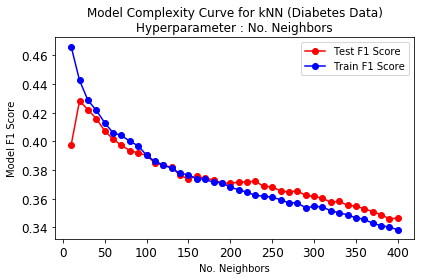

In [10]:
hyperKNN(scale_x_train, _y_train, scale_x_test, _y_test,title="Model Complexity Curve for kNN (Diabetes Data)\nHyperparameter : No. Neighbors")


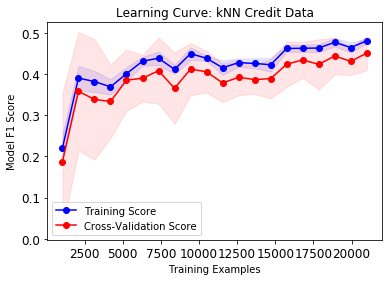

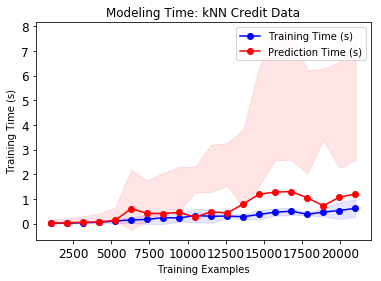

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.62588
Model Prediction Time (s): 10.36769

F1 Score:  0.43
Accuracy:  0.81     AUC:       0.64
Precision: 0.66     Recall:    0.32
*****************************************************


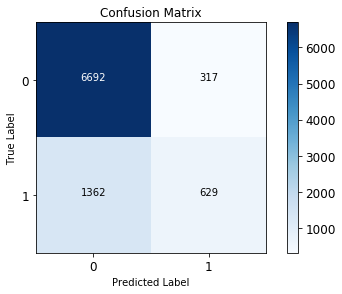

In [7]:
KNN_credit = kNN(n_neighbors=20, n_jobs=-1)
train_samp_phish, kNN_train_score_phish, kNN_fit_time_phish, kNN_pred_time_phish = plot_learning_curve(KNN_credit, scale_x_train, _y_train,title="kNN Credit Data")
final_classifier_evaluation(KNN_credit, scale_x_train, scale_x_test, _y_train, _y_test)
